In [133]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
#import dataset

df =pd.read_csv("customer_booking.csv",encoding= "ISO-8859-1")

In [135]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


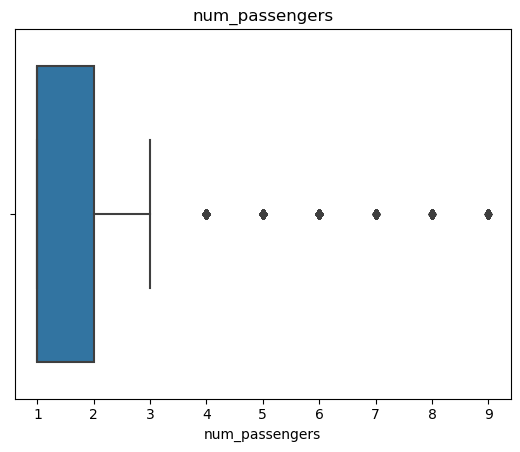

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64


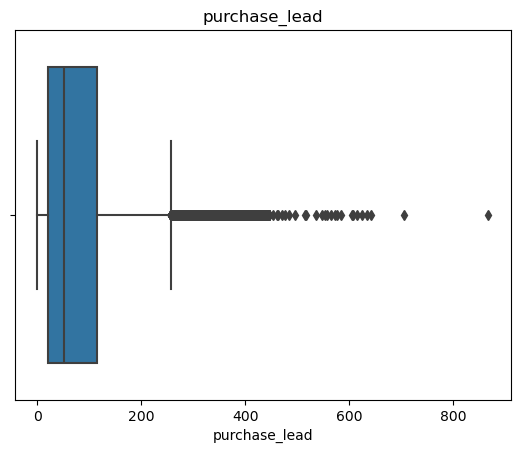

1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: purchase_lead, Length: 470, dtype: int64


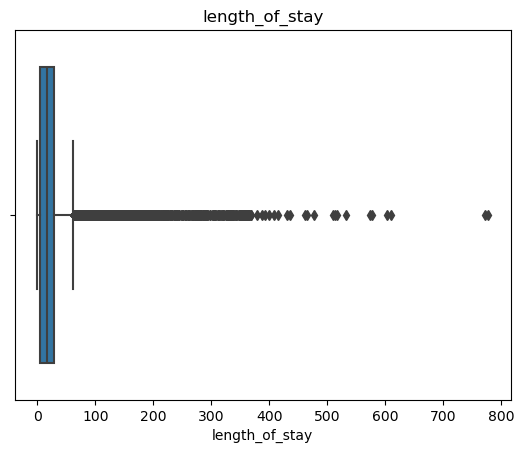

6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: length_of_stay, Length: 335, dtype: int64


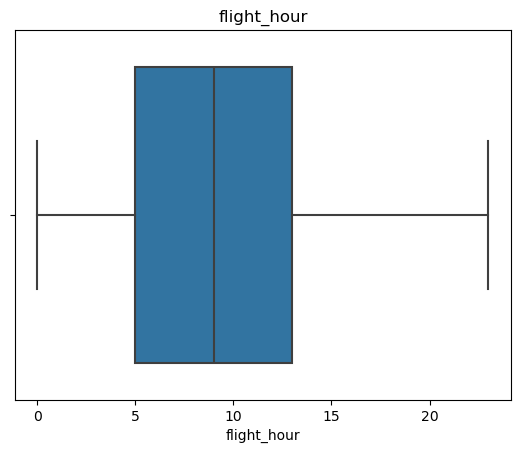

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64


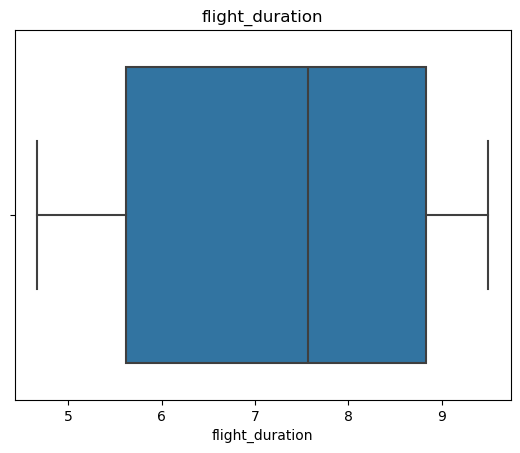

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, dtype: int64


In [136]:
#detect outlier using boxplot
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
for column in numerical_columns:
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.show()
    
    print(df[column].value_counts())

In [137]:
#Handle outliers using IQR
data =df.copy()
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
for column in numerical_columns:
    Q1 =data[column].quantile(0.25)
    Q3 =data[column].quantile(0.75)
    IQR =Q3-Q1
    
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    
    outlier =df[((df[column]<lower_bound) | (df[column]>upper_bound))]
    
    median_val =data[column].median()
    
    data[column] = data[column].apply(lambda x: upper_bound if x>upper_bound else(median_val if x<lower_bound else x))

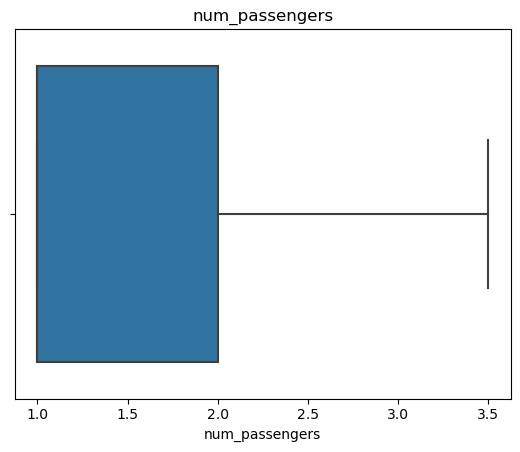

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64


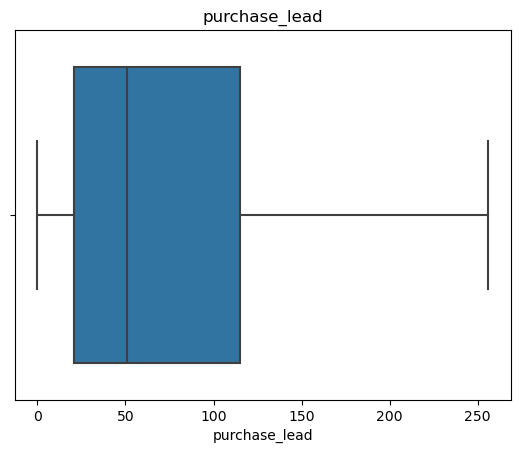

1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: purchase_lead, Length: 470, dtype: int64


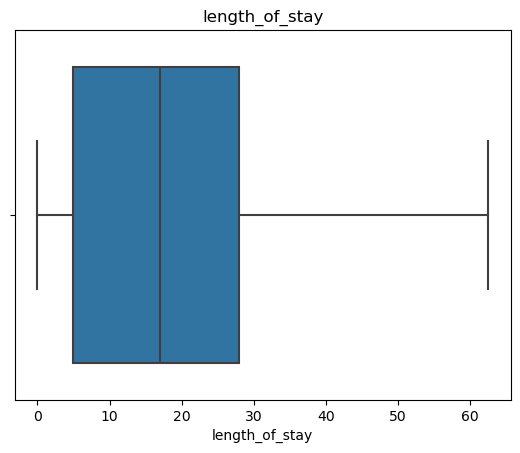

6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: length_of_stay, Length: 335, dtype: int64


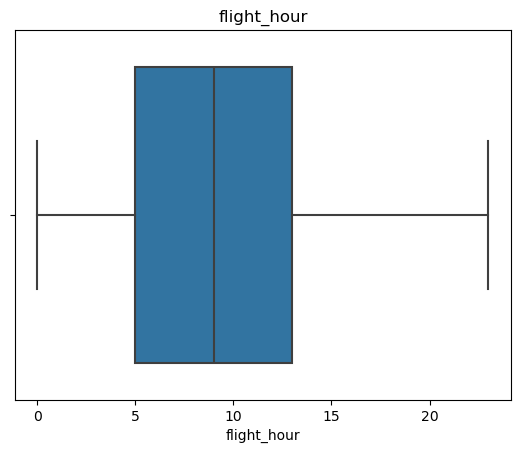

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64


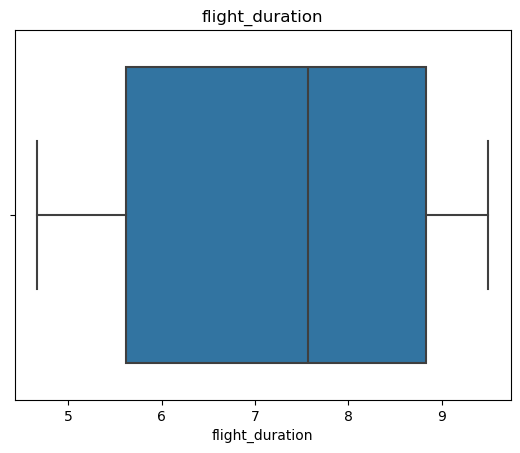

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, dtype: int64


In [131]:
for column in numerical_columns:
    sns.boxplot(data=data, x=column)
    plt.title(column)
    plt.show()
    
    print(df[column].value_counts())

In [138]:
#Rearrange dataframe

#data = data.drop(columns=['route','booking_origin' ], axis=1 )

data['total_service_requested'] =data['wants_extra_baggage']+data['wants_preferred_seat']+data['wants_in_flight_meals']

data.drop(columns=['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals'] ,axis=1, inplace=True)

In [139]:
data.shape

(50000, 12)

In [140]:
#Handle categorical variables
#data =df.copy()
categorical_columns =[column for column in data.columns if data[column].dtypes =='O']
#categorical_columns =['sales_channel', 'trip_type', 'flight_day']
numerical_columns   =[column for column in data.columns if data[column].dtypes !='O']

In [141]:
#apply onehot encoding
from sklearn.preprocessing import OneHotEncoder

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [142]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,booking_complete,total_service_requested,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2.0,256.0,19.0,7,5.52,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,112.0,20.0,3,5.52,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,243.0,22.0,17,5.52,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,96.0,31.0,4,5.52,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,68.0,22.0,15,5.52,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [159]:
data.drop()

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_duration', 'booking_complete', 'total_service_requested',
       'sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip',
       ...
       'booking_origin_Timor-Leste', 'booking_origin_Tonga',
       'booking_origin_Tunisia', 'booking_origin_Turkey',
       'booking_origin_Ukraine', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vanuatu', 'booking_origin_Vietnam'],
      dtype='object', length=917)

In [143]:
#split dataset to train test
from sklearn.model_selection import train_test_split

X =data.drop(columns=['booking_complete'], axis=1)
y =data['booking_complete']

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=42 )

In [144]:
data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [145]:
#Apply SMOTE to balance the training set
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=42)

X_train_balanced, y_train_balanced =smote.fit_resample(X_train, y_train)

In [146]:
X_train_balanced.shape ,y_train_balanced.value_counts()

((59476, 916),
 0    29738
 1    29738
 Name: booking_complete, dtype: int64)

In [121]:
#feature scaling :Normalize or standardize numerical features to ensure that they are on the same scale.

from sklearn.preprocessing import StandardScaler

for column in numerical_columns:
    if column == 'booking_complete':
        break
        
    scaler = StandardScaler()
    data[column]   = scaler.fit_transform(data[[column]])

In [147]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,booking_complete,total_service_requested,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2.0,256.0,19.0,7,5.52,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,112.0,20.0,3,5.52,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,243.0,22.0,17,5.52,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,96.0,31.0,4,5.52,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,68.0,22.0,15,5.52,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Model Selection and Training:

In [151]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [152]:
y_pred= clf.predict(X_test)

In [153]:
#Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy =accuracy_score(y_test, y_pred)
print(f'accuracy : {accuracy * 100:.2f}%')

#print classification report
print(classification_report(y_test, y_pred))

#print confusion matrix
print(confusion_matrix( y_test, y_pred))

accuracy : 78.51%
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12784
           1       0.30      0.33      0.31      2216

    accuracy                           0.79     15000
   macro avg       0.59      0.60      0.59     15000
weighted avg       0.80      0.79      0.79     15000

[[11044  1740]
 [ 1484   732]]


In [157]:
#finetune DT
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tunner =GridSearchCV(estimator=clf,
    param_grid=param_grid,
    n_jobs=-1)

In [158]:
tunner.fit(X_train_balanced, y_train_balanced)

KeyboardInterrupt: 

In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# List of instantiated models
models = [
    DecisionTreeRegressor(random_state=42),
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    GradientBoostingClassifier(random_state=42),
    AdaBoostRegressor(random_state=42)
]

# Loop through each model
for model in models:
    if isinstance(model, DecisionTreeRegressor) or isinstance(model, AdaBoostRegressor):
        # For Regressors
        model.fit(X_train, y_train)  # Assuming y_train is suitable for regression
        y_pred = model.predict(X_test)  # Predict using the trained model
        # Evaluate the model (you'd typically use regression metrics here)
    else:
        # For Classifiers
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Evaluate the model (classification metrics like accuracy, precision, etc.)
        from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model.__class__.__name__} Accuracy: {accuracy * 100:.2f}%')
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        

RandomForestClassifier Accuracy: 85.18%
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     12784
           1       0.49      0.12      0.20      2216

    accuracy                           0.85     15000
   macro avg       0.68      0.55      0.56     15000
weighted avg       0.81      0.85      0.81     15000

[[12505   279]
 [ 1944   272]]
GradientBoostingClassifier Accuracy: 85.28%
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12784
           1       0.52      0.04      0.08      2216

    accuracy                           0.85     15000
   macro avg       0.69      0.52      0.50     15000
weighted avg       0.81      0.85      0.80     15000

[[12695    89]
 [ 2119    97]]


In [45]:
#Evaluate the model

y_pred =model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
#Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy =accuracy_score(y_test, y_pred)
print(f'accuracy : {accuracy * 100:.2f}%')

#print classification report
print(classification_report(y_test, y_pred))

#print confusion matrix
print(confusion_matrix( y_test, y_pred))

accuracy : 85.30%
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     12784
           1       0.51      0.12      0.19      2216

    accuracy                           0.85     15000
   macro avg       0.69      0.55      0.56     15000
weighted avg       0.81      0.85      0.81     15000

[[12528   256]
 [ 1949   267]]


AUC-ROC: 0.78


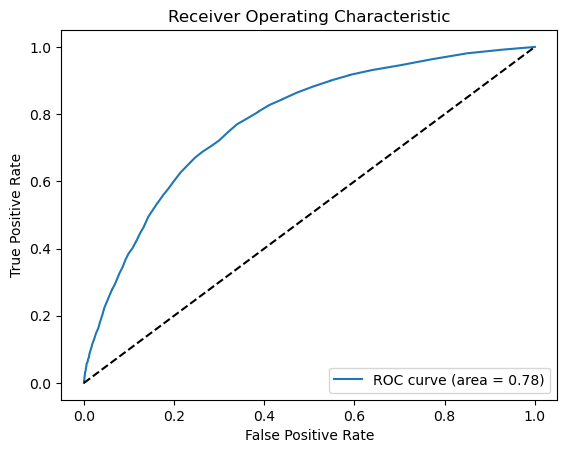

In [15]:
# Plotting ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.2f}")


fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model finetuning

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

fine_tuner =GridSearchCV(estimator=model,
    param_grid=param_grid,
    cv=5,n_jobs=1)

In [33]:
fine_tuner.fit(X_train, y_train)

KeyboardInterrupt: 